In [2]:
import pandas
import matplotlib.pyplot as plt

## Terms in phases

In [4]:
df1 = pandas.read_csv('D:/BG/Paper_2/analyses-2/Labelling/Phases-annotated.csv')
print(df1['Phases'].value_counts())
df1

Software                      1877
Support Activities            1839
Tooling and Machining          290
Supply Chain and Logistics     250
Ideation and Development       164
Design                         163
Materials                      120
Production and Assembling      119
General Skills                 109
Name: Phases, dtype: int64


,SkillId,Skill_US,IsSpecialized,IsSoftware,IsBaseline,IsLanguage,IsActive,SkillCluster,SkillClusterFamily,Phases
0,3,anxiety reduction,1,0,0,0,1,mental and behavioral health specialties,health care,NaN
1,5,injections,1,0,0,0,1,blood collection,health care,NaN
2,11,hm customs and excise,1,0,0,0,1,na,na,NaN
3,12,behavioral health,1,0,0,0,1,mental and behavioral health specialties,health care,NaN
4,13,energy management,1,0,0,0,1,energy management,energy and utilities,NaN
...,...,...,...,...,...,...,...,...,...,...
12010,18031,latex,1,1,0,0,1,typesetting software,information technology,Software
12011,18034,rapid recovery,1,0,0,0,1,system design and implementation,information technology,Software
12012,18035,react javascript,1,1,0,0,1,javascript and jquery,information technology,Software
12013,18036,virtual reality (vr),1,0,0,0,1,augumented reality / virtual reality (ar / vr),information technology,Software


## Dictionary of phases

In [5]:
Design = df1.loc[df1['Phases'] == 'Design','Skill_US'].tolist()
General = df1.loc[df1['Phases'] == 'General Skills','Skill_US'].tolist()
Ideation = df1.loc[df1['Phases'] == 'Ideation and Development','Skill_US'].tolist()
Materials = df1.loc[df1['Phases'] == 'Materials','Skill_US'].tolist()
Production = df1.loc[df1['Phases'] == 'Production and Assembling','Skill_US'].tolist()
Software = df1.loc[df1['Phases'] == 'Software','Skill_US'].tolist()
Supply = df1.loc[df1['Phases'] == 'Supply Chain and Logistics','Skill_US'].tolist()
Support = df1.loc[df1['Phases'] == 'Support Activities','Skill_US'].tolist()
Tooling = df1.loc[df1['Phases'] == 'Tooling and Machining','Skill_US'].tolist()
Nan = df1.loc[df1['Phases'].isna(),'Skill_US'].tolist()

mydict = {'Design':Design,'General Skills':General,'Ideation and Development':Ideation,'Materials':Materials,'Nan':Nan,'Production and Assembling':Production,'Software':Software,'Supply Chain and Logistics':Supply,'Support Activities':Support,'Tooling and Machining':Tooling,}

## Service Bureaus (SBs)

In [6]:
SB = pandas.read_csv('D:/BG/Paper_2/analyses-2/SB/SB-Data.csv')
SB.columns

Index(['BGTJobId', 'JobDate', 'CleanTitle', 'CanonTitle', 'SOC', 'SOCName',
       'ONET', 'ONETName', 'Employer', 'Sector', 'SectorName', 'NAICS3',
       'NAICS4', 'NAICS5', 'NAICS6', 'City', 'County', 'State', 'Lat', 'Lon',
       'Edu', 'MaxEdu', 'Degree', 'MaxDegree', 'Exp', 'MaxExp', 'MinSalary',
       'MaxSalary', 'MinHrlySalary', 'MaxHrlySalary', 'PayFrequency',
       'SalaryType', 'JobHours', 'SOC2', 'SOC4', 'SOC5', 'SK',
       'Employer_clean', 'n_terms', 'SK_without', 'TECH', 'occupation',
       'firm1', 'firm2', 'firm', 'plant', 'plant_5'],
      dtype='object')

## Calculating the number of terms in each phase for Service Bureaus (SB)

In [7]:
df2 = SB.copy()
df2.SK = df2.SK.str.split(',')
df2['Length'] = df2.SK.str.len()
df2 = df2[['BGTJobId','SK','TECH','occupation','Length']]
mylist = df2[['BGTJobId','SK']].values.tolist()
print(mylist[0:5])
df3 = []
for job in mylist:
  for phase in mydict:
    c = 0
    for phrase in mydict[phase]:
      c = c + job[1].count(phrase)
    df3.append([job[0],phase,c])
df3 =  pandas.DataFrame(df3,columns=['BGTJobId','Phases','Count'])
df3 = df3.pivot(index='BGTJobId',columns='Phases',values='Count')
df3 = df3.merge(df2,left_on='BGTJobId',right_on='BGTJobId')
df3 = df3[['BGTJobId','SK','TECH','occupation']+list(mydict.keys())+['Length']]
df3

[[351932089, ['troubleshooting', 'verbal / oral communication', 'communication skills', 'problem solving', 'detail-oriented', 'mechanical engineering', 'legal compliance', 'civil engineering', 'design modification', 'writing', 'carpentry']], [352056182, ['machining', 'welding', 'industrial mechanic experience', 'mechanical maintenance', 'hydraulics', 'technical training', 'repair', 'carpentry']], [352057607, ['mechanical maintenance', 'carpentry']], [352058746, ['electrical devices', 'carpentry']], [352058822, ['budgeting', 'staff management', 'troubleshooting', 'verbal / oral communication', 'communication skills', 'writing', 'carpentry', 'civil engineering', 'design modification', 'problem solving', 'detail-oriented', 'mechanical engineering', 'legal compliance']]]


,BGTJobId,SK,TECH,occupation,Design,General Skills,Ideation and Development,Materials,Nan,Production and Assembling,Software,Supply Chain and Logistics,Support Activities,Tooling and Machining,Length
0,351932089,"[troubleshooting, verbal / oral communication,...",TM,Engineer,0,6,0,0,4,0,0,0,1,0,11
1,352056182,"[machining, welding, industrial mechanic exper...",TM,Technician,0,0,0,0,3,1,0,0,1,3,8
2,352057607,"[mechanical maintenance, carpentry]",TM,Engineer,0,0,0,0,1,0,0,0,0,1,2
3,352058746,"[electrical devices, carpentry]",TM,Technician,0,0,0,0,2,0,0,0,0,0,2
4,352058822,"[budgeting, staff management, troubleshooting,...",TM,Manager,0,6,0,0,4,0,0,0,3,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,38688610810,"[sample preparation, quality assurance and con...",TM,Operator,0,0,0,0,2,0,0,0,3,3,8
12441,38688744068,"[manufacturing processes, material requirement...",TM,Manager,2,6,0,0,3,1,2,7,5,1,27
12442,38689002966,"[algebra, microsoft excel, manual dexterity, c...",AM,Operator,1,4,0,0,2,0,2,0,2,1,12
12443,38689119712,[international traffic in arms regulations (it...,TM,Technician,0,1,0,0,0,0,0,0,1,3,5


## To binary

In [8]:
df4 = df3.copy()
for phase in list(mydict.keys()):
  df4.loc[df4[phase]>0,phase] = 1
df4['Phases-Sum'] = df4[list(mydict.keys())].sum(axis=1)
df4['Primary-Sum'] = df4[['Ideation and Development','Design','Materials','Tooling and Machining','Production and Assembling','Supply Chain and Logistics']].sum(axis=1)
df4

,BGTJobId,SK,TECH,occupation,Design,General Skills,Ideation and Development,Materials,Nan,Production and Assembling,Software,Supply Chain and Logistics,Support Activities,Tooling and Machining,Length,Phases-Sum,Primary-Sum
0,351932089,"[troubleshooting, verbal / oral communication,...",TM,Engineer,0,1,0,0,1,0,0,0,1,0,11,3,0
1,352056182,"[machining, welding, industrial mechanic exper...",TM,Technician,0,0,0,0,1,1,0,0,1,1,8,4,2
2,352057607,"[mechanical maintenance, carpentry]",TM,Engineer,0,0,0,0,1,0,0,0,0,1,2,2,1
3,352058746,"[electrical devices, carpentry]",TM,Technician,0,0,0,0,1,0,0,0,0,0,2,1,0
4,352058822,"[budgeting, staff management, troubleshooting,...",TM,Manager,0,1,0,0,1,0,0,0,1,0,13,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,38688610810,"[sample preparation, quality assurance and con...",TM,Operator,0,0,0,0,1,0,0,0,1,1,8,3,1
12441,38688744068,"[manufacturing processes, material requirement...",TM,Manager,1,1,0,0,1,1,1,1,1,1,27,8,4
12442,38689002966,"[algebra, microsoft excel, manual dexterity, c...",AM,Operator,1,1,0,0,1,0,1,0,1,1,12,6,2
12443,38689119712,[international traffic in arms regulations (it...,TM,Technician,0,1,0,0,0,0,0,0,1,1,5,3,1


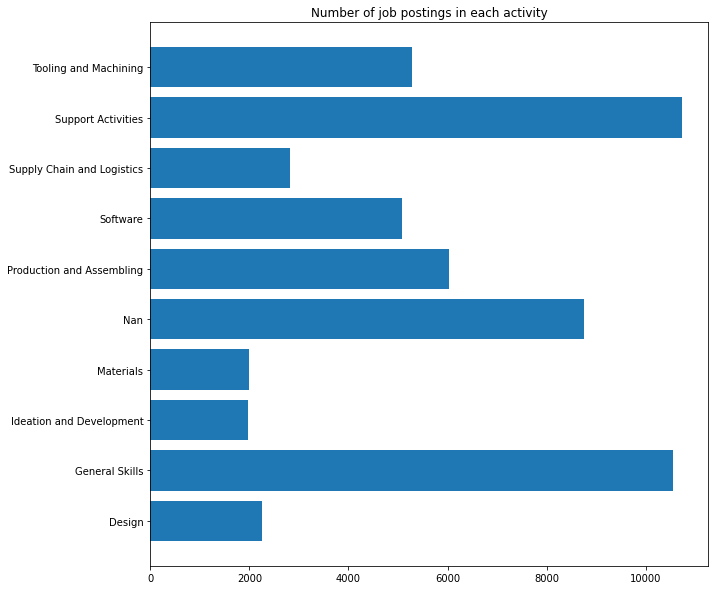

In [9]:
fig = plt.figure(figsize=(10,10))
plt.barh(list(mydict.keys()),df4[list(mydict.keys())].sum(axis=0))
plt.title('Number of job postings in each activity')
plt.show()

## Distribution of the number of primary activities per job posting

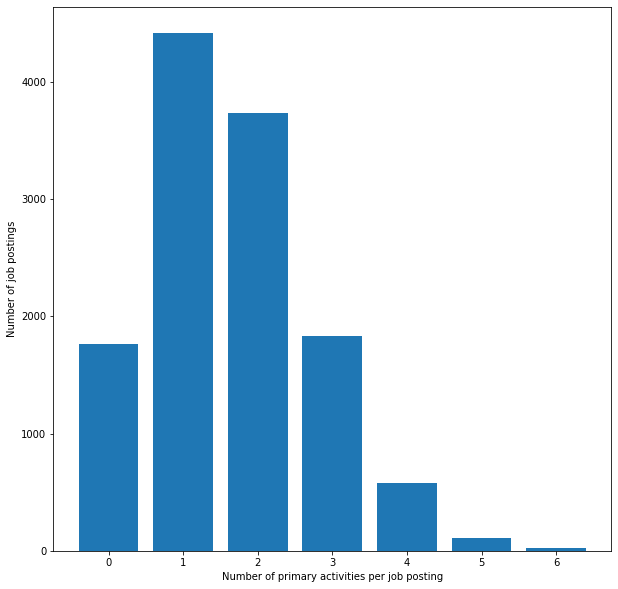

In [10]:
fig = plt.figure(figsize=(10,10))
plt.bar(df4.groupby(['Primary-Sum'])['BGTJobId'].count().index.to_list(),df4.groupby(['Primary-Sum'])['BGTJobId'].count())
plt.xlabel('Number of primary activities per job posting')
plt.ylabel('Number of job postings')
plt.show()

## Mean of the number of primary activities per job posting by technology and occupation

In [11]:
df4.groupby(['TECH','occupation'])['Primary-Sum'].mean().unstack('TECH').reindex(['Manager','Engineer','Technician','Operator'],axis=0)

TECH,AM,TM
occupation,,
Manager,2.380208,1.179366
Engineer,3.302222,2.095989
Technician,2.290909,1.992586
Operator,2.524272,1.441368
